In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')
plt.style.use('seaborn-darkgrid')
plt.rcParams['font.sans-serif']=['simhei']   # 用黑体显示中文
plt.rcParams['axes.unicode_minus']=False     # 正常显示负号

### 1. 数据读取

In [2]:
train = pd.read_csv('./data/used_car_train_20200313.csv', sep=' ')
test = pd.read_csv('./data/used_car_testB_20200421.csv', sep=' ')

* name - 汽车编码

* regDate - 汽车注册时间

* model - 车型编码

* brand - 品牌

* bodyType - 车身类型

* fuelType - 燃油类型

* gearbox - 变速箱

* power - 汽车功率

* kilometer - 汽车行驶公里

* notRepairedDamage - 汽车有尚未修复的损坏

* regionCode - 看车地区编码

* seller - 销售方

* offerType - 报价类型

* creatDate - 广告发布时间

* price - 汽车价格

* v_0', 'v_1', ..., 'v_14' - 匿名特征，包含v0-14在内15个匿名特征

In [3]:
# 简略查看训练数据
train.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,20160404,1850,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,-,4366,0,0,20160309,3600,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,0,20160402,6222,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,0,0,20160312,2400,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,0,0,20160313,5200,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [4]:
train.shape

(150000, 31)

In [5]:
# 简略查看测试数据
test.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,200000,133777,20000501,67.0,0,1.0,0.0,0.0,101,15.0,0.0,5019,0,0,20160308,42.142061,-3.094739,-0.721300,1.466344,1.009846,0.236520,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322
1,200001,61206,19950211,19.0,6,2.0,0.0,0.0,73,6.0,0.0,1505,0,0,20160310,43.907034,-3.244605,-0.766430,1.276718,-1.065338,0.261518,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542
2,200002,67829,20090606,5.0,5,4.0,0.0,0.0,120,5.0,-,1776,0,0,20160309,45.389665,3.372384,-0.965565,-2.447316,0.624268,0.261691,0.090836,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173
3,200003,8892,20020601,22.0,9,1.0,0.0,0.0,58,15.0,0.0,26,0,0,20160314,42.788775,4.035052,-0.217403,1.708806,1.119165,0.236050,0.101777,0.098950,0.026830,0.096614,-2.846788,2.800267,-2.524610,1.076819,0.461610
4,200004,76998,20030301,46.0,6,0.0,NaN,0.0,116,15.0,0.0,738,0,0,20160306,43.670763,-3.135382,-1.134107,0.470315,0.134032,0.257000,0.000000,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014


In [6]:
test.shape

(50000, 30)

### 2. 数据分析

#### 2.1 数值属性分析

In [7]:
# 通过describe()来熟悉训练数据数值属性的相关统计量
train_numeric_features = [
    'power', 'kilometer', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
    'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'
]
train[train_numeric_features].describe()

,power,kilometer,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,119.316547,12.597160,5923.327333,44.406268,-0.044809,0.080765,0.078833,0.017875,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,177.168419,3.919576,7501.998477,2.457548,3.641893,2.929618,2.026514,1.193661,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.500000,11.000000,30.451976,-4.295589,-4.470671,-7.275037,-4.364565,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,75.000000,12.500000,1300.000000,43.135799,-3.192349,-0.970671,-1.462580,-0.921191,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,110.000000,15.000000,3250.000000,44.610266,-3.052671,-0.382947,0.099722,-0.075910,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,150.000000,15.000000,7700.000000,46.004721,4.000670,0.241335,1.565838,0.868758,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,19312.000000,15.000000,99999.000000,52.304178,7.320308,19.035496,9.854702,6.829352,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [8]:
# 通过describe()来熟悉测试数据数值属性的相关统计量
test_numeric_features = [
    'power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
    'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'
]
test[test_numeric_features].describe()

,power,kilometer,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,119.766960,12.598260,44.400023,-0.065525,0.079706,0.078381,0.022361,0.248147,0.044624,0.124693,0.058198,0.062113,0.019633,0.002759,0.004342,0.004570,-0.007209
std,206.313348,3.912519,2.459920,3.636631,2.930829,2.019136,1.194215,0.045836,0.051664,0.201440,0.029171,0.035723,3.764095,3.289523,2.515912,1.287194,1.044718
min,0.000000,0.500000,31.122325,-4.231855,-4.032142,-5.801254,-4.233626,0.000000,0.000000,0.000000,0.000000,0.000000,-9.119719,-5.662163,-8.291868,-4.157649,-6.098192
25%,75.000000,12.500000,43.120935,-3.193169,-0.967832,-1.456793,-0.922153,0.243436,0.000035,0.062519,0.035413,0.033880,-3.675196,-1.963928,-1.865406,-1.048722,-0.440706
50%,110.000000,15.000000,44.601493,-3.053506,-0.384910,0.118448,-0.068187,0.257818,0.000801,0.095880,0.056804,0.058749,1.632134,-0.375537,-0.138943,-0.036352,0.136849
75%,150.000000,15.000000,45.987018,3.978703,0.239689,1.563490,0.871565,0.265263,0.101654,0.125470,0.079387,0.087624,2.846205,1.263451,1.775632,0.945239,0.685555
max,19211.000000,15.000000,51.676686,7.190759,18.865988,9.386558,4.959106,0.291176,0.153403,1.411559,0.157458,0.211304,12.177864,18.789496,13.384828,5.635374,2.649768


In [9]:
# 通过info()来熟悉训练数据类型
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

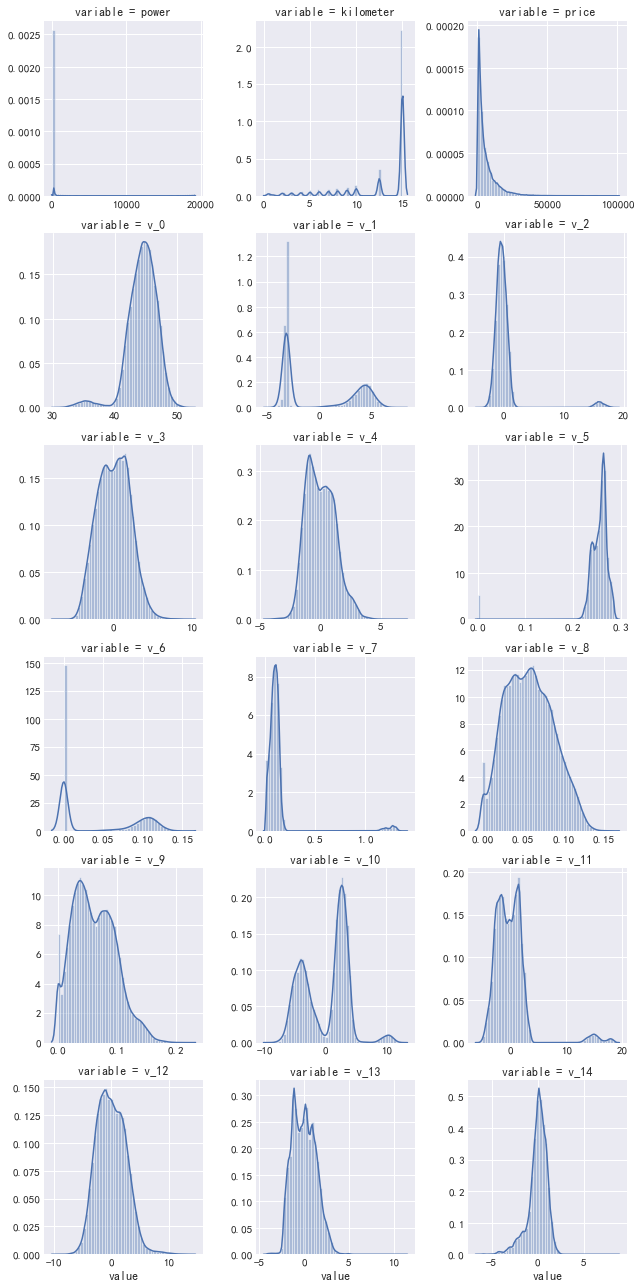

In [10]:
# 可视化训练数据中的数值属性
f_train = pd.melt(train, value_vars=train_numeric_features)
g_train = sns.FacetGrid(f_train, col="variable",  col_wrap=3, sharex=False, sharey=False)
g_train = g_train.map(sns.distplot, "value")
plt.show()

'price'为长尾分布，需要对其做数据转换

'power'应该存在异常值，需要处理

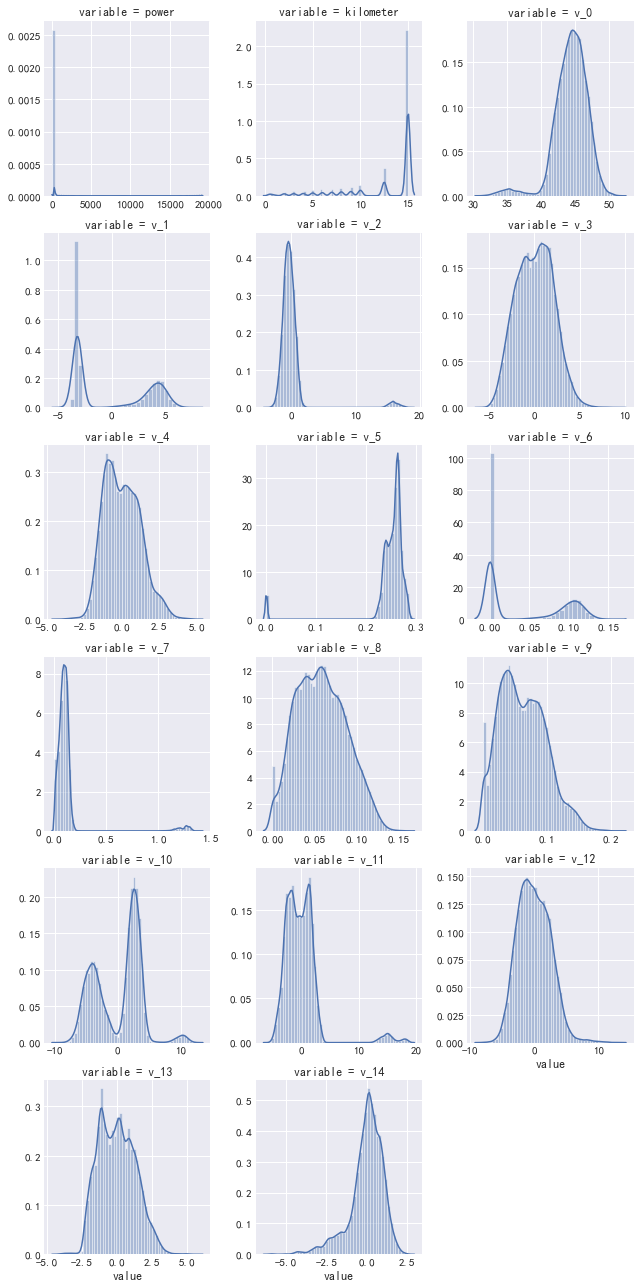

In [11]:
# 可视化测试数据中的数值属性
f_test = pd.melt(test, value_vars=test_numeric_features)
g_test = sns.FacetGrid(f_test, col="variable",  col_wrap=3, sharex=False, sharey=False)
g_test = g_test.map(sns.distplot, "value")
plt.show()

#### 2.2 类别属性分析

In [12]:
# 分析训练数据类别特征nunique分布
category_features = [
    'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox',
    'kilometer', 'notRepairedDamage', 'regionCode', 'seller', 'offerType',
    'creatDate'
]
for feature in category_features:
    print(feature + "的特征分布如下：")
    print("{}特征有个{}不同的值".format(feature, train[feature].nunique()))
    print(train[feature].value_counts())
    print(72 * '-')

name的特征分布如下：
name特征有个99662不同的值
708       282
387       282
55        280
1541      263
203       233
53        221
713       217
290       197
1186      184
911       182
2044      176
1513      160
1180      158
631       157
893       153
2765      147
473       141
1139      137
1108      132
444       129
306       127
2866      123
2402      116
533       114
1479      113
422       113
4635      110
725       110
964       109
1373      104
         ... 
89083       1
95230       1
164864      1
173060      1
179207      1
181256      1
185354      1
25564       1
19417       1
189324      1
162719      1
191373      1
193422      1
136082      1
140180      1
144278      1
146327      1
148376      1
158621      1
1404        1
15319       1
46022       1
64463       1
976         1
3025        1
5074        1
7123        1
11221       1
13270       1
174485      1
Name: name, Length: 99662, dtype: int64
------------------------------------------------------------------------
re

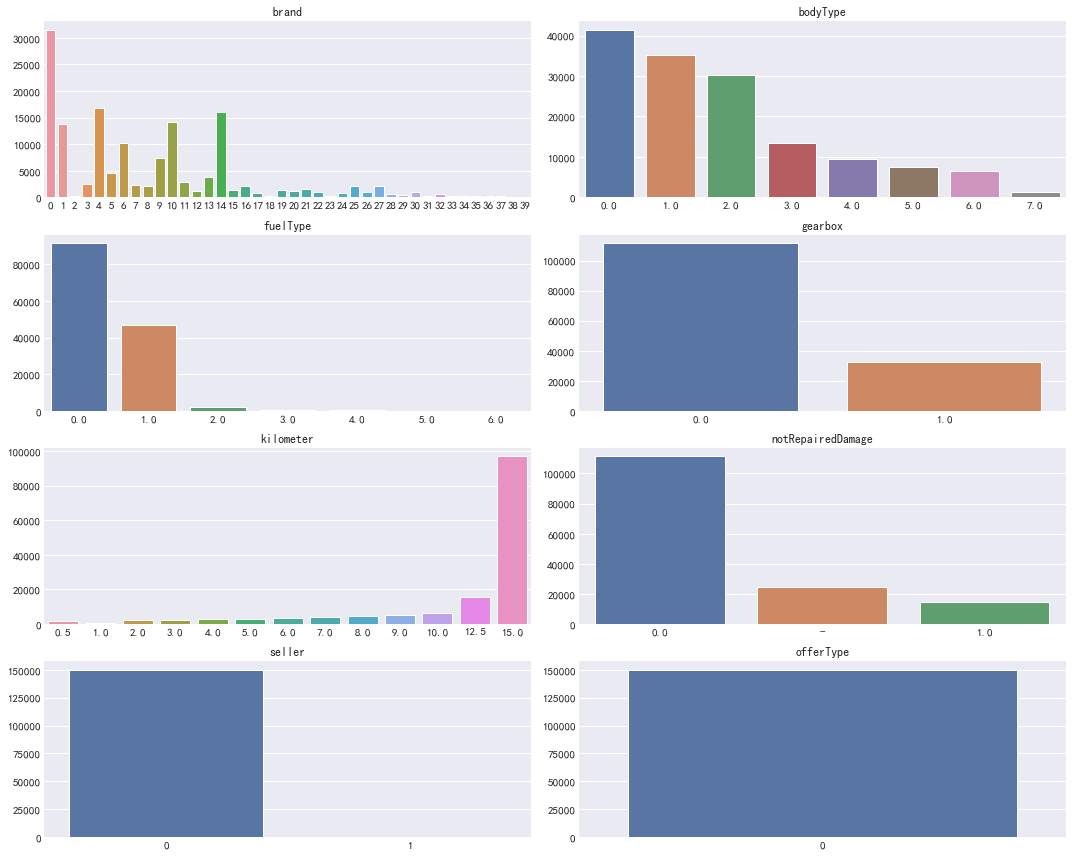

In [13]:
# 对训练数据类别特征取值较少的，画出直方图
plt.figure(figsize=(15, 12))
i = 1
for feature in category_features:
    if train[feature].nunique() < 50:
        plt.subplot(4, 2, i)
        i += 1
        v = train[feature].value_counts()
        fig = sns.barplot(x=v.index, y=v.values)
        plt.title(feature)
plt.tight_layout()
plt.show()

In [14]:
# 分析测试数据类别特征nunique分布
for feature in category_features:
    print(feature + "的特征分布如下：")
    print("{}特征有个{}不同的值".format(feature, test[feature].nunique()))
    print(test[feature].value_counts())
    print(72 * '-')

name的特征分布如下：
name特征有个37536不同的值
387       94
55        93
1541      86
708       85
203       78
713       75
911       72
1180      71
53        68
290       68
631       67
1186      60
473       54
306       53
2866      52
2044      50
422       49
893       47
1513      46
2765      45
533       44
964       44
1139      41
1479      41
2825      38
444       37
4635      37
984       37
282       35
691       33
          ..
9747       1
7857       1
75120      1
144754     1
15731      1
66932      1
76360      1
66082      1
89231      1
93561      1
161146     1
21886      1
42368      1
101765     1
89653      1
38278      1
89645      1
60809      1
62858      1
195979     1
185951     1
81299      1
168479     1
28057      1
30106      1
97691      1
155039     1
44449      1
112034     1
105129     1
Name: name, Length: 37536, dtype: int64
------------------------------------------------------------------------
regDate的特征分布如下：
regDate特征有个3819不同的值
20000012    61
20000002    

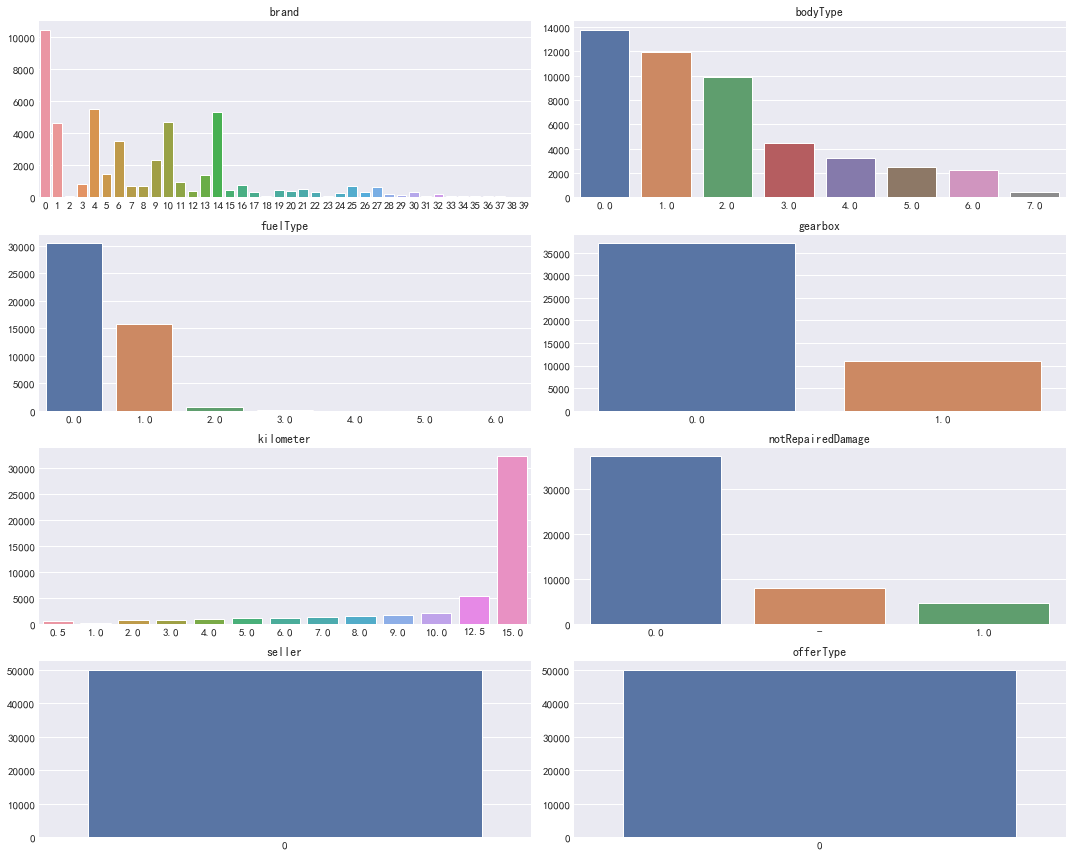

In [15]:
# 对测试数据类别特征取值较少的，画出直方图
plt.figure(figsize=(15, 12))
i = 1
for feature in category_features:
    if test[feature].nunique() < 50:
        plt.subplot(4, 2, i)
        i += 1
        v = test[feature].value_counts()
        fig = sns.barplot(x=v.index, y=v.values)
        plt.title(feature)
plt.tight_layout()
plt.show()

可以发现两个类别特征严重倾斜，分别是'seller'和'offerType'，上述两个特征对分析预测没有任何帮助。

另外，'notRepairedDamage'有3个不同的属性值：0.0，1.0，'-'，其中'-'应该也为空值。

'name'为汽车交易名称，一般对分析预测没有帮助，但是同名数据不少，可以挖掘

#### 2.3 数据缺失值

In [16]:
# 分析训练数据缺失值
train.isnull().sum()[train.isnull().sum() > 0]

model          1
bodyType    4506
fuelType    8680
gearbox     5981
dtype: int64

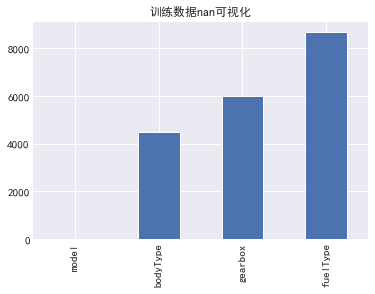

In [17]:
# 训练数据nan可视化
train_missing = train.isnull().sum()
train_missing = train_missing[train_missing > 0]
train_missing.sort_values(inplace=True)
train_missing.plot.bar()
plt.title("训练数据nan可视化")
plt.show()

In [18]:
# 分析测试数据缺失值
test.isnull().sum()[test.isnull().sum() > 0]

bodyType    1504
fuelType    2924
gearbox     1968
dtype: int64

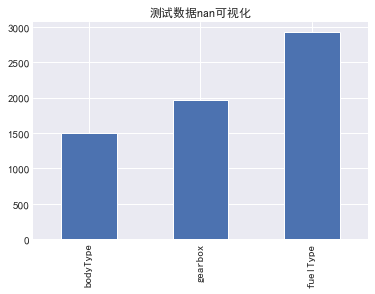

In [19]:
# 测试数据nan可视化
test_missing = test.isnull().sum()
test_missing = test_missing[test_missing > 0]
test_missing.sort_values(inplace=True)
test_missing.plot.bar()
plt.title("测试数据nan可视化")
plt.show()

#### 2.4 相关性分析

In [20]:
# 对'price'属性进行相关性分析
price_numeric = train[train_numeric_features]
correlation = price_numeric.corr()
print(correlation['price'].sort_values(ascending = False),'\n')

price        1.000000
v_12         0.692823
v_8          0.685798
v_0          0.628397
power        0.219834
v_5          0.164317
v_2          0.085322
v_6          0.068970
v_1          0.060914
v_14         0.035911
v_13        -0.013993
v_7         -0.053024
v_4         -0.147085
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
kilometer   -0.440519
v_3         -0.730946
Name: price, dtype: float64 



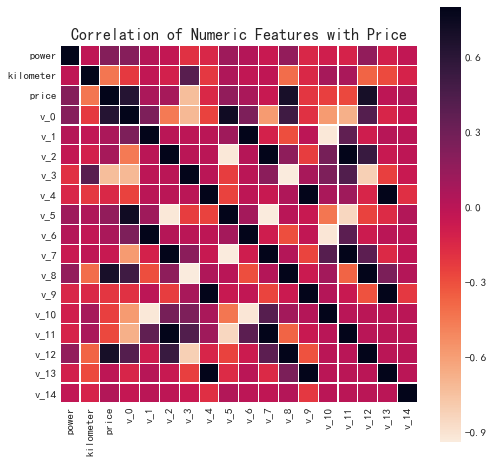

In [21]:
f, ax = plt.subplots(figsize=(8, 8))
plt.title('Correlation of Numeric Features with Price', y=1, size=16)
sns.heatmap(correlation, square=True, vmax=0.8, linewidths=0.1, cmap=sns.cm.rocket_r)
plt.show()

匿名特征v_0, v_3, v_8, v_12与'price'相关性很高

### 3. 数据预处理

#### 3.1 处理目标值长尾分布

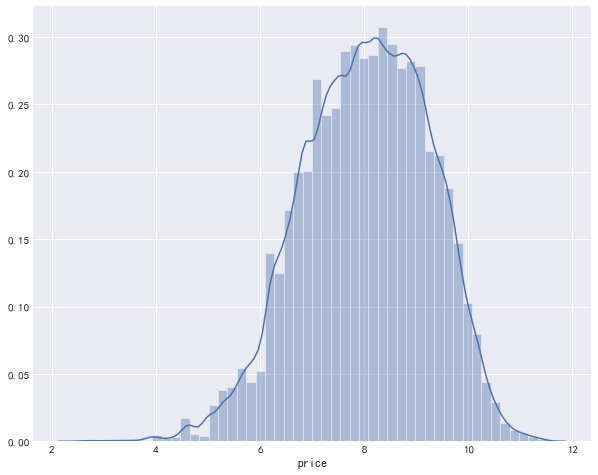

In [22]:
# price 为长尾分布，对该特征进行处理
train['price'] = np.log1p(train['price'])

# 可视化处理后'price'分布
plt.figure(figsize=(10, 8))
sns.distplot(train['price'])
plt.show()

#### 3.2 处理无用值

In [23]:
# 合并训练数据和测试数据，方便后续数据预处理
df = pd.concat([train, test], axis=0, ignore_index=True)
df.head()

,SaleID,bodyType,brand,creatDate,fuelType,gearbox,kilometer,model,name,notRepairedDamage,offerType,power,price,regDate,regionCode,seller,v_0,v_1,v_10,v_11,v_12,v_13,v_14,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9
0,0,1.0,6,20160404,0.0,0.0,12.5,30.0,736,0.0,0,60,7.523481,20040402,1046,0,43.357796,3.966344,-2.881803,2.804097,-2.420821,0.795292,0.914762,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462
1,1,2.0,1,20160309,0.0,0.0,15.0,40.0,2262,-,0,0,8.188967,20030301,4366,0,45.305273,5.236112,-4.900482,2.096338,-1.030483,-1.722674,0.245522,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582
2,2,1.0,15,20160402,0.0,0.0,12.5,115.0,14874,0.0,0,163,8.736007,20040403,2806,0,45.978359,4.823792,-4.846749,1.803559,1.565330,-0.832687,-0.229963,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075
3,3,0.0,10,20160312,0.0,1.0,15.0,109.0,71865,0.0,0,193,7.783641,19960908,434,0,45.687478,4.492574,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000
4,4,1.0,5,20160313,0.0,0.0,5.0,110.0,111080,0.0,0,68,8.556606,20120103,6977,0,44.383511,2.031433,-1.896240,0.910783,0.931110,2.834518,1.923482,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534


In [24]:
# SaleID为交易ID，肯定没用，但是我们可以用来统计别的特征的group数量
# name为汽车交易名称，已经脱敏一般没什么好挖掘的，不过同名的好像不少，可以挖掘一下
df['name_count'] = df.groupby(['name'])['SaleID'].transform('count')
df.drop(['name'], axis=1, inplace=True)

#### 3.3 处理特征严重倾斜数据

In [25]:
# 'seller'、'offerType'特征严重倾斜，训练数据中'seller'有一个特殊值，删除该样本
df.drop(df[df['seller'] == 1].index, inplace=True)

df.drop(['seller'], inplace=True, axis=1)
df.drop(['offerType'], inplace=True, axis=1)

#### 3.4 处理异常值

In [26]:
# 在题目中规定了power范围为[0, 600]
df['power'] = df['power'].map(lambda x: 600 if x > 600 else x)

# 'notRepairedDamage'属性中'-'应该也是空值，用nan替换
df['notRepairedDamage'].replace('-', np.nan, inplace=True)

#### 3.5 处理缺失值

In [27]:
# 查看缺失值
df.isnull().sum()[df.isnull().sum() > 0]

bodyType              6010
fuelType             11604
gearbox               7949
model                    1
notRepairedDamage    32392
price                50000
dtype: int64

In [28]:
# 用众数填充缺失值
df.fuelType.fillna(df.fuelType.mode()[0], inplace=True)
df.gearbox.fillna(df.gearbox.mode()[0], inplace=True)
df.bodyType.fillna(df.bodyType.mode()[0], inplace=True)
df.model.fillna(df.model.mode()[0], inplace=True)
df.notRepairedDamage.fillna(df.notRepairedDamage.mode()[0], inplace=True)

In [29]:
df.isnull().sum()[df.isnull().sum() > 0]

price    50000
dtype: int64

df是由训练数据和测试数据合并而来，测试数据有50000个样本，预测特征是price，因此df中存在50000个缺失price特征的样本

#### 3.6 处理时间属性信息

In [30]:
def date_process(x):
    year = int(str(x)[:4])
    month = int(str(x)[4:6])
    day = int(str(x)[6:8])

    if month < 1:
        month = 1

    date = datetime(year, month, day)
    return date

In [31]:
df['regDates'] = df['regDate'].apply(date_process)
df['creatDates'] = df['creatDate'].apply(date_process)
df['regDate_year'] = df['regDates'].dt.year
df['regDate_month'] = df['regDates'].dt.month
df['regDate_day'] = df['regDates'].dt.day
df['creatDate_year'] = df['creatDates'].dt.year
df['creatDate_month'] = df['creatDates'].dt.month
df['creatDate_day'] = df['creatDates'].dt.day
# df['car_age_day'] = (df['creatDates'] - df['regDates']).dt.days
# df['car_age_year'] = round(df['car_age_day'] / 365, 1)

In [33]:
# 切割数据，导出数据
output_path = './process_data/'
print(df.shape)
train_num = df.shape[0] - 50000
df[:int(train_num)].to_csv(output_path + 'train_data_v1.csv', index=False, sep=' ')
df[train_num:train_num + 50000].to_csv(output_path + 'test_data_v1.csv', index=False, sep=' ')

(199999, 37)
